In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from random import seed
from scipy import stats
import seaborn as sns
import pingouin as pg
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
import statsmodels.api as sm
from statsmodels.stats.api import anova_lm
from statsmodels.formula.api import ols
from statsmodels.regression import linear_model
from sklearn.metrics import explained_variance_score
%matplotlib inline

seed(888)

In [170]:
# load data from pickle and convert to dataframe
brain_test = pd.read_pickle("3_brain_test.pkl")
brain_train = pd.read_pickle("3_brain_train.pkl")
main_test = pd.read_pickle("3_main_test.pkl")
main_train = pd.read_pickle("3_main_train.pkl")
brain_test = pd.DataFrame(brain_test)
brain_train = pd.DataFrame(brain_train)
main_test = pd.DataFrame(main_test)
main_train = pd.DataFrame(main_train)

pd.set_option('display.max_columns', None)

In [171]:
main_test['Imaging site'] = main_test['Imaging site'].map({'Cheadle': 1, 'Reading': 2,'Newcastle': 3, 'Bristol': 4})
main_test["Smoking"] = main_test["Smoking"].map({"No":0, "Only occasionally":1, "Yes, on most or all days":2})
main_test["Gender"] = main_test["Gender"].map({"Female":0, "Male":1})
main_test["Job PA"] = main_test["Job PA"].map({"Never/rarely":0, "Sometimes":1, "Usually":2,"Always":3})
main_test["Walking speed"] = main_test["Walking speed"].map({"Slow pace":0, "Steady average pace":1, "Brisk pace":2})
main_test["Gender"] = main_test["Gender"].astype("int")
main_test["MVPA"] = main_test["Moderate PA"] + main_test["Vigorous PA"]*2

del main_test["BA Desikan Delta Corr"]
del main_test["BA Delta Corr"]
del main_test["BA ASEG Delta Corr"]

main_test = main_test.rename(columns={"BA A2009 Delta Corr": "BA", "Total PA":"TPA", "Light PA":"LPA", "Moderate PA": "MPA","Vigorous PA":"VPA", "ECG max workload":"ECGW", 
    "ECG max heart rate":"ECGH","Townsend deprivation":"SES", "SR Walking PA":"SRLPA", "SR Moderate PA":"SRMPA", "SR Vigorous PA":"SRVPA",
     "Heart rate":"HR","Hand grip R":"HGR", "Imaging site":"IS", "Fluid intelligence":"FI", "S Blood pressure":"SBP", "D Blood pressure":"DBP", "Mental disorder":"MD"})

main_test = pd.DataFrame(main_test)


Text(0.5, 1.0, 'Correlations All')

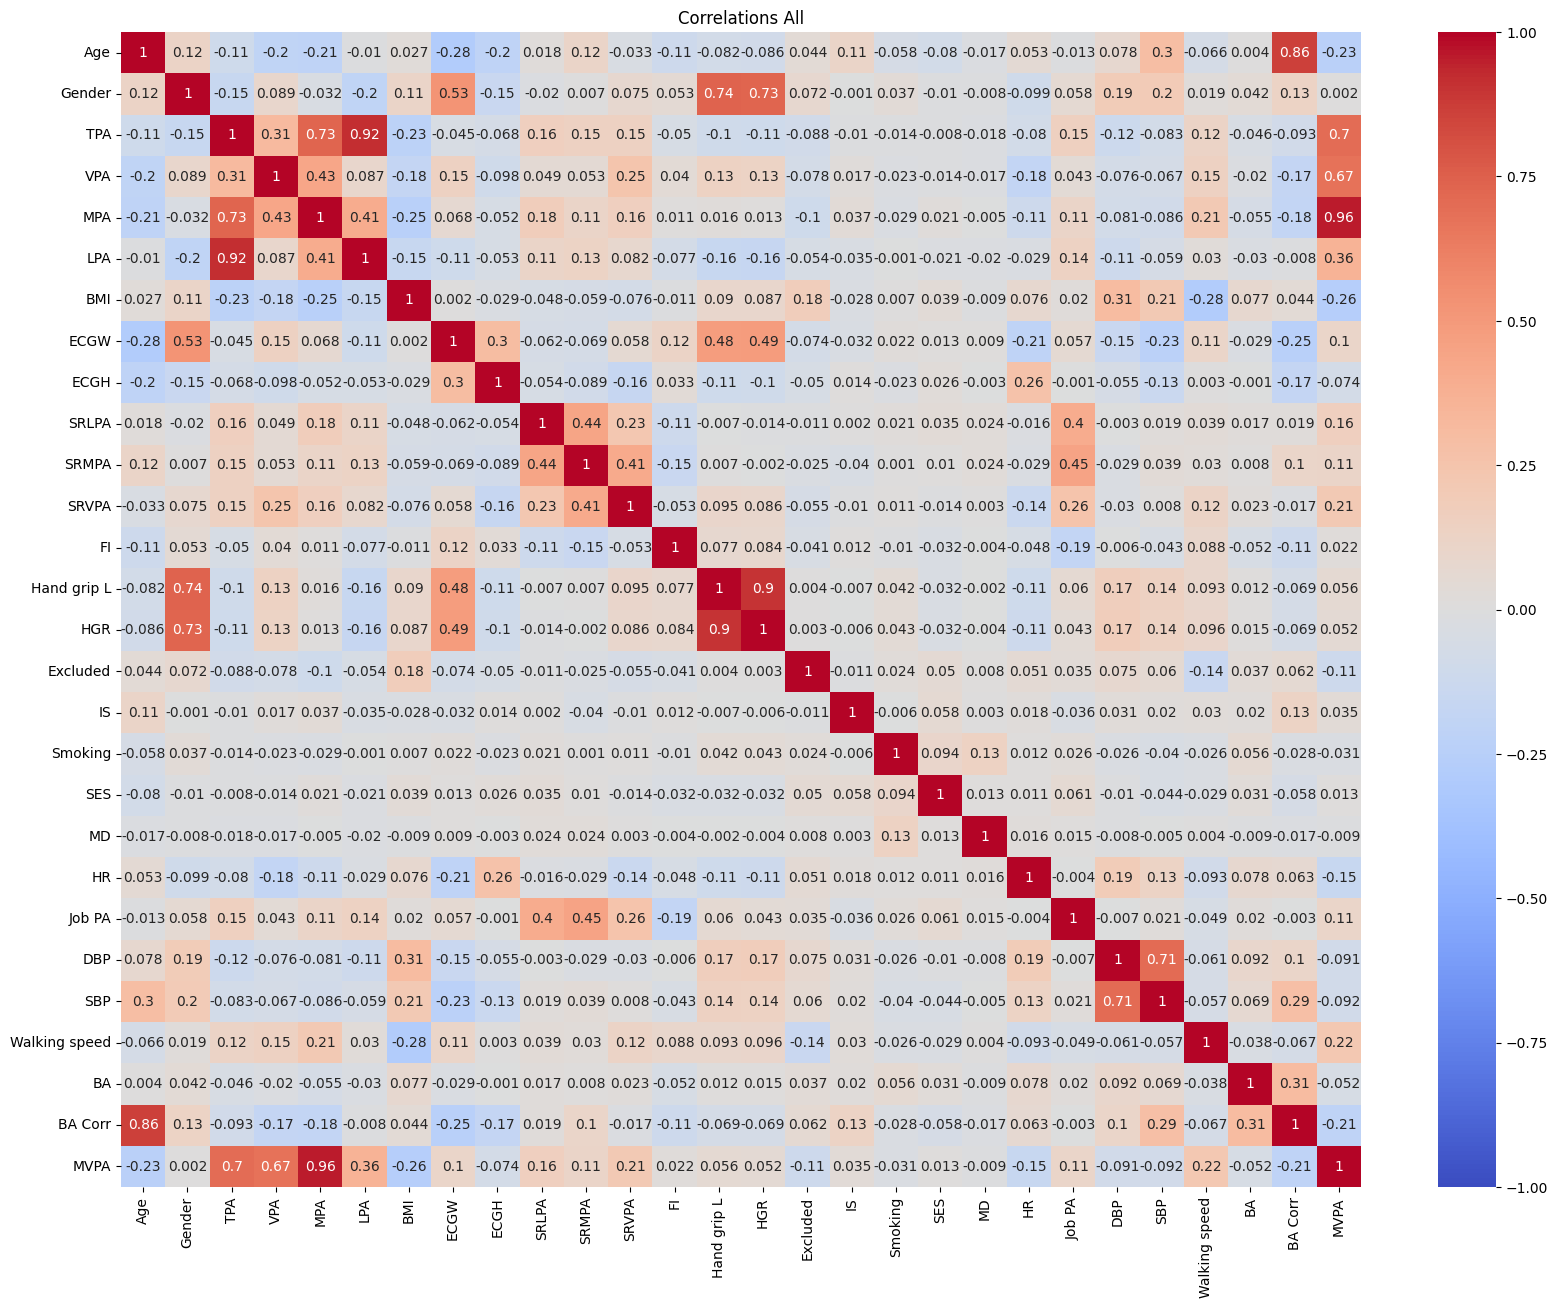

In [172]:
corr = main_test.corr()
corr = round(corr,3)
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(corr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.title("Correlations All")

Text(0.5, 1.0, 'Correlations All')

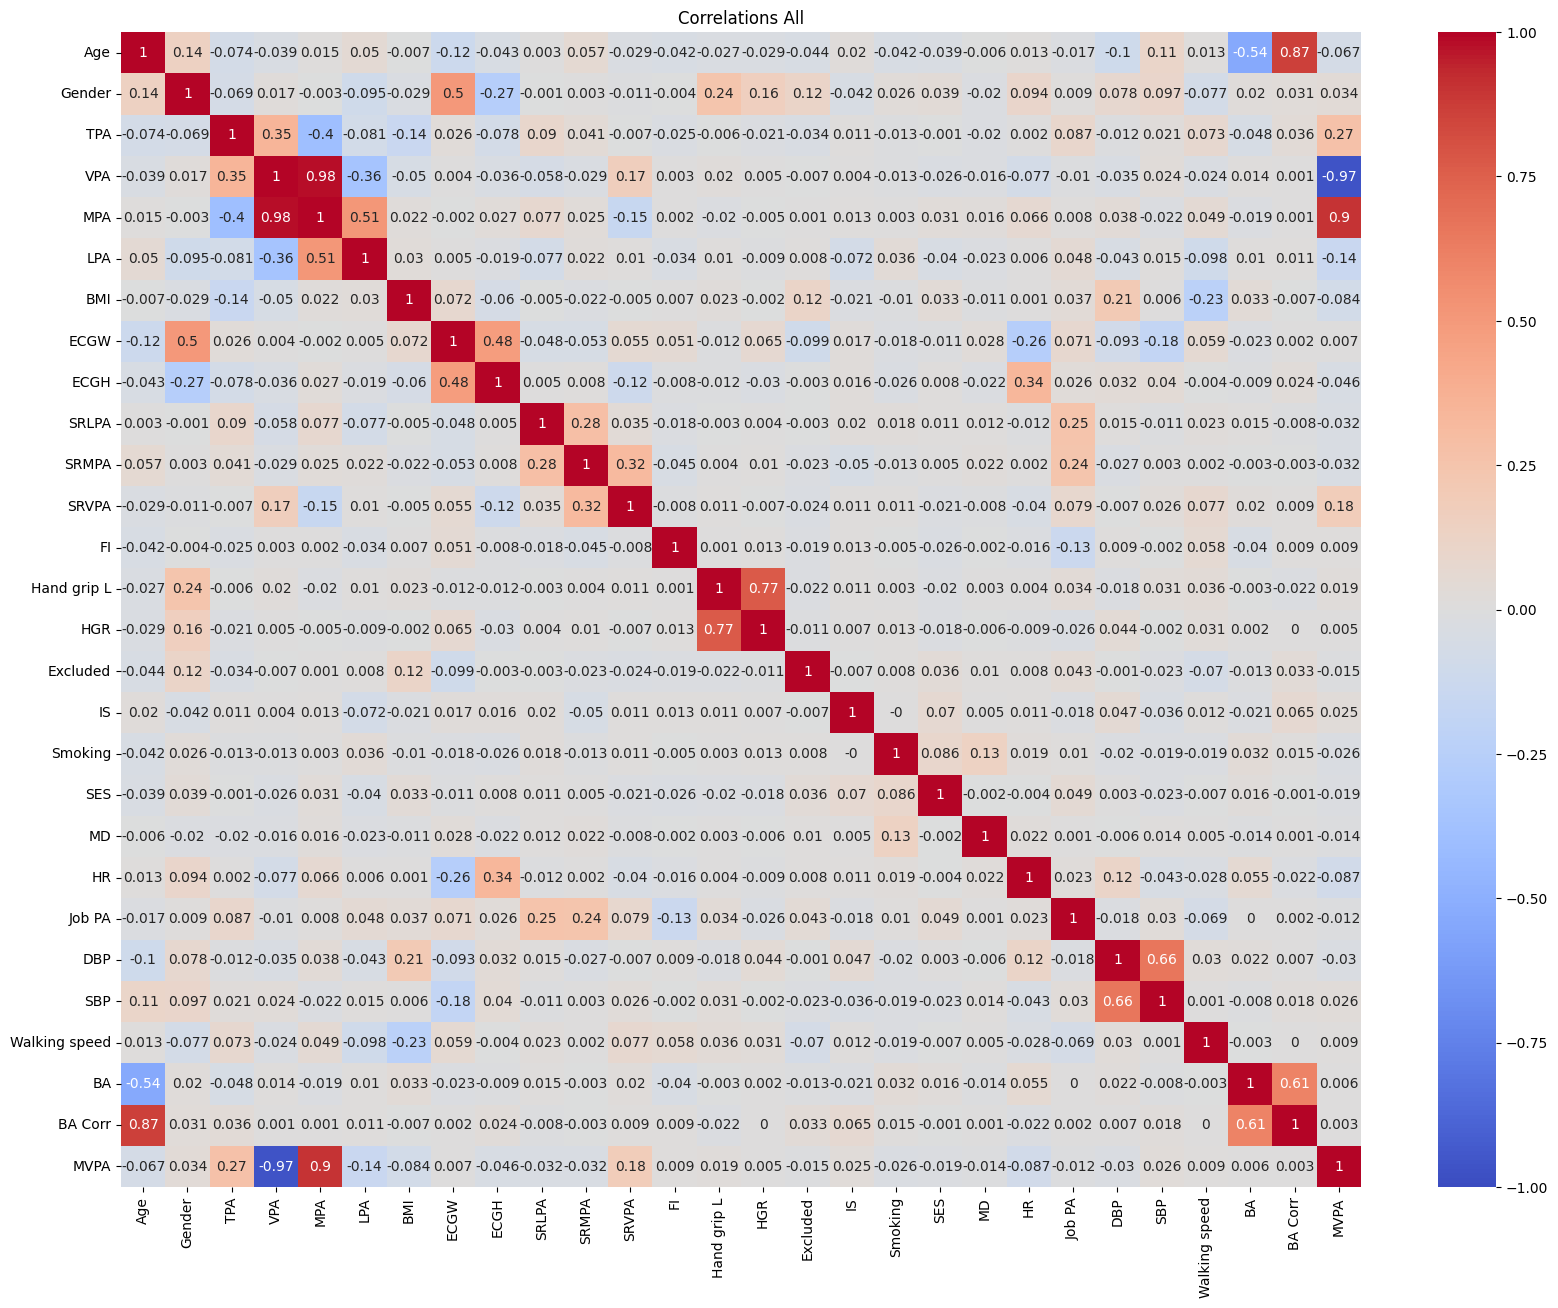

In [173]:
main_test_2 = main_test
#del main_test_2["Age"]
corr = main_test_2.pcorr()
corr = round(corr,3)
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(corr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.title("Correlations All")

2        26.0
6        36.0
12       39.0
21       18.0
25       20.0
         ... 
43132    45.0
43133    30.0
43159    22.0
43162    32.0
43165    46.0
Name: HGR, Length: 8357, dtype: float64
25.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f94d00f2190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f94d00f23d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f94d008a550>,
 'medians': [<matplotlib.lines.Line2D at 0x7f94d0094ee0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f94d007e4f0>,
 'means': []}

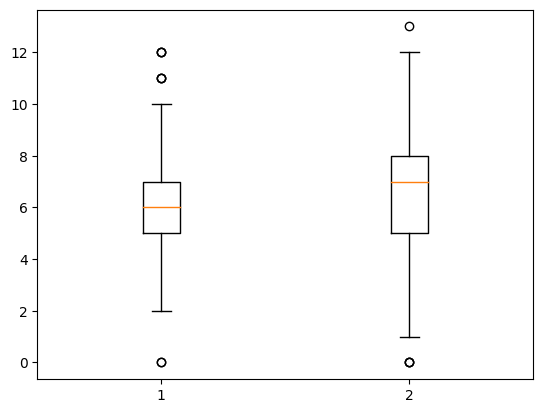

In [174]:
#main_test = main_test[main_test["Gender"]==0]

#main_test["HGR"] = stats.zscore(main_test['HGR'], nan_policy='omit')
#main_test["MPA"] = stats.zscore(main_test['MPA'], nan_policy='omit')
main_test["LPA"] = stats.zscore(main_test['LPA'], nan_policy='omit')
main_test = pd.DataFrame(main_test)



print(main_test["HGR"])

quartile_1_pa = np.percentile(main_test["MPA"], 25)
quartile_4_pa = np.percentile(main_test["MPA"], 65)
quartile_1_hg = np.nanpercentile(main_test["HGR"], 25)
quartile_4_hg = np.nanpercentile(main_test["HGR"], 65)

main_test_q1 = main_test[main_test["MPA"]<quartile_1_pa ] #) & (main_test["HGR"]<quartile_1_hg)]
main_test_q4 = main_test[main_test["MPA"]>quartile_4_pa] #) & (main_test["HGR"]>quartile_4_hg) ]
#main_test_middle = main_test[(main_test["BA Corr"]<quartile_4_ba) & (main_test["BA Corr"]> quartile_1_ba)]

print(quartile_1_hg)
main_test_q1 = main_test_q1[main_test_q1["HGR"]<quartile_1_hg]
main_test_q4 = main_test_q4[main_test_q4["HGR"]<quartile_4_hg]



main_test_q1 = main_test_q1[["DBP","FI", "BA"]]
main_test_q4 = main_test_q4[["DBP","FI", "BA"]]

main_test_q1 = main_test_q1.dropna(axis=0)
main_test_q4 = main_test_q4.dropna(axis=0)


# main_test_q1 = pd.DataFrame(main_test_q1)
# main_test_q4 = pd.DataFrame(main_test_q4)


plt.boxplot(x = [main_test_q1["FI"],main_test_q4["FI"]])



{'whiskers': [<matplotlib.lines.Line2D at 0x7f94ced8a0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f94ced964c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f94ced8a4c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f94ceda2280>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f94ceda2880>,
 'means': []}

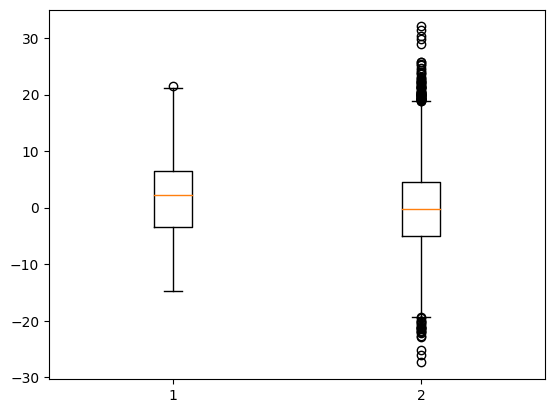

In [175]:
mental = main_test[main_test["Smoking"]==2]
no_mental = main_test[main_test["Smoking"] == 0]
plt.boxplot(x=[mental["BA"],no_mental["BA"]])

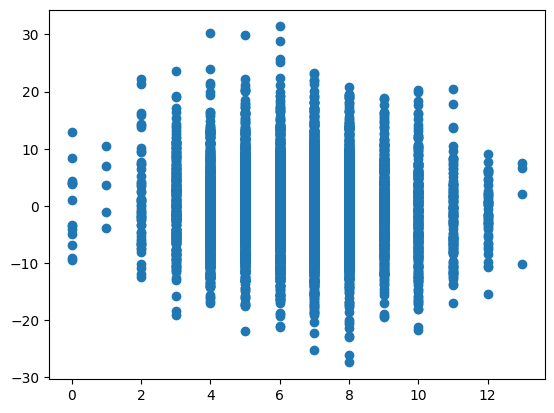

In [176]:
plt.scatter(x = "FI", y="BA", data=main_test)

In [177]:
# scaler = StandardScaler()
# scaler.fit_transform(main_test[["SRLPA", "SRMPA", "SRVPA", "LPA", "MPA","VPA", "MVPA", "HGR", "Age", "SBP", "DBP", "HR"]])

# main_test = pd.DataFrame(main_test)

In [178]:
cov_correlation = pg.partial_corr(data=main_test, x='SRLPA', y='BA', covar=["Gender", "IS", "Age"])
print("Light PA")
print(cov_correlation)
cov_correlation = pg.partial_corr(data=main_test, x='SRMPA', y='BA', covar=["Gender", "IS", "Age"])
print("Moderate PA")
print(cov_correlation)
cov_correlation = pg.partial_corr(data=main_test, x='SRVPA', y='BA', covar=["Gender", "IS", "Age"])
print("Vigorous PA")
print(cov_correlation)
cov_correlation = pg.partial_corr(data=main_test, x='TPA', y='BA', covar=["Gender", "IS", "Age"])
print("Total PA")
print(cov_correlation)
cov_correlation = pg.partial_corr(data=main_test, x='MVPA', y='BA', covar=["Gender", "IS", "Age"])
print("Moderate+Vigorous PA")
print(cov_correlation)

Light PA
            n         r          CI95%     p-val
pearson  7156  0.017795  [-0.01, 0.04]  0.132353
Moderate PA
            n         r          CI95%     p-val
pearson  7156  0.009496  [-0.01, 0.03]  0.421948
Vigorous PA
            n         r         CI95%     p-val
pearson  7156  0.019902  [-0.0, 0.04]  0.092363
Total PA
            n         r           CI95%     p-val
pearson  8357 -0.039868  [-0.06, -0.02]  0.000268
Moderate+Vigorous PA
            n         r           CI95%         p-val
pearson  8357 -0.054888  [-0.08, -0.03]  5.173434e-07


In [199]:
main_test["MPA"] = stats.zscore(main_test['MPA'], nan_policy='omit')
main_test["VPA"] = stats.zscore(main_test['VPA'], nan_policy='omit')
main_test["LPA"] = stats.zscore(main_test['LPA'], nan_policy='omit')
main_test["BA"] = stats.zscore(main_test['BA'], nan_policy='omit')
main_test["Age"] = stats.zscore(main_test['Age'], nan_policy='omit')

print(main_test.shape)

pa_model = ols('BA ~ LPA + MPA + VPA + Gender + Age + IS + Gender:Age + Gender:IS', missing='drop', data = main_test).fit()
print(pa_model.summary())

(8357, 28)
                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.551
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.14e-11
Time:                        15:10:04   Log-Likelihood:                -11824.
No. Observations:                8357   AIC:                         2.367e+04
Df Residuals:                    8348   BIC:                         2.373e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0347      0.032     -1.0

In [186]:
main_test["SRMPA"] = stats.zscore(main_test['SRMPA'], nan_policy='omit')
main_test["SRVPA"] = stats.zscore(main_test['SRVPA'], nan_policy='omit')
main_test["SRLPA"] = stats.zscore(main_test['SRLPA'], nan_policy='omit')
sr_pa_model = ols('BA ~ SRLPA + SRMPA + SRVPA +LPA + MPA + VPA+ Gender + Age + IS + Gender:Age + Gender:IS', missing='drop', data = main_test).fit()
print(sr_pa_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.973
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           8.88e-10
Time:                        14:42:35   Log-Likelihood:                -10128.
No. Observations:                7156   AIC:                         2.028e+04
Df Residuals:                    7144   BIC:                         2.036e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0491      0.036     -1.373      0.1

In [187]:
model_comparison = anova_lm(pa_model, sr_pa_model)
print(model_comparison)

   df_resid          ssr  df_diff      ss_diff         F    Pr(>F)
0    8348.0  8289.072684      0.0          NaN       NaN       NaN
1    7144.0  7104.793776   1204.0  1184.278907  0.989048  0.594505


In [182]:
results = ols('BA ~ HGR + SBP + HR + DBP + Age + Gender + IS', missing='drop', data = main_test).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     12.61
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           3.70e-16
Time:                        14:40:41   Log-Likelihood:                -9303.2
No. Observations:                6579   AIC:                         1.862e+04
Df Residuals:                    6571   BIC:                         1.868e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9402      0.126     -7.449      0.0

In [183]:
results = ols('BA ~ HGR + HR + DBP + FI + MPA + Age + IS', missing='drop', data = main_test).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     8.883
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           6.58e-11
Time:                        14:40:41   Log-Likelihood:                -6624.2
No. Observations:                4680   AIC:                         1.326e+04
Df Residuals:                    4672   BIC:                         1.332e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6911      0.147     -4.686      0.0

In [184]:
results = ols('BA ~ MPA + Age + IS + Gender + Gender:Age + Gender:IS + IS:Age', missing='drop', data = main_test).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     10.17
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           9.61e-13
Time:                        14:40:41   Log-Likelihood:                -11823.
No. Observations:                8357   AIC:                         2.366e+04
Df Residuals:                    8349   BIC:                         2.372e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0376      0.032     -1.162      0.2

In [194]:
results = ols('BA ~ MPA + DBP + Age + SES + Smoking +  HR + Excluded + IS + Gender + Gender:Age + Gender:IS + IS:Age', missing='drop', data = main_test).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     11.69
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           9.94e-24
Time:                        14:45:58   Log-Likelihood:                -9297.7
No. Observations:                6592   AIC:                         1.862e+04
Df Residuals:                    6579   BIC:                         1.871e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9405      0.117     -8.041      0.0

In [204]:
results = ols('BA ~ MPA', missing='drop', data = main_test).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     25.36
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           4.85e-07
Time:                        15:51:00   Log-Likelihood:                -11845.
No. Observations:                8357   AIC:                         2.369e+04
Df Residuals:                    8355   BIC:                         2.371e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.78e-19      0.011  -3.46e-17      1.0

In [203]:
pg.anova(data= main_test, dv="BA", between=["MPA"],effsize="n2")

,Source,ddof1,ddof2,F,p-unc,n2
0,MPA,3112,5244,0.978735,0.74803,0.367417


In [205]:
pg.compute_effsize_from_t(-4.5, nx=8357, ny=8357, eftype='cohen')

-0.06961491713567308